In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from utils.metrics import Results


### Funções auxiliares

In [2]:
def load_metrics(model_name):
    with open(f'metrics/{model_name}_metrics.npy', 'rb') as f:
        acc = np.load(f, allow_pickle=True)
        f1 = np.load(f, allow_pickle=True)
        cm = np.load(f, allow_pickle=True)
        roc = np.load(f, allow_pickle=True)
        # grid_results = np.load(f, allow_pickle=True)
    return acc, f1, cm, roc #, grid_results

In [3]:
def plot_box(dfs, metrics):
    fig, axs = plt.subplots(1, 2, figsize=(8,4))
    for i in [0,1]:
        axs[i].boxplot(dfs[i].values)
        axs[i].set_xticklabels(dfs[i].columns)
        axs[i].set_title(f'{metrics[i]} (10-Fold CV)')
        axs[i].set_xlabel('Modelos')
        axs[i].set_ylabel(metrics[i])

    fig.suptitle('Boxplots das Métricas')
    fig.tight_layout()

    plt.show()

def plot_cms(cm_list, models_name):
    fig, axs = plt.subplots(2, 3, figsize=(16,8))
    # Confusion Matrix
    for idx in range(6):
        cm_mean = np.mean(cm_list[idx], axis=0)
        axs[idx//3, idx%3] = sns.heatmap(cm_mean, linewidths=0.5, annot=True, fmt='g', ax=axs[idx//3, idx%3], cmap = sns.cm.rocket_r)
        axs[idx//3, idx%3].set_yticklabels(axs[idx//3, idx%3].get_yticklabels(), rotation=0)
        axs[idx//3, idx%3].set_title(f'{models_name[idx]}')
        axs[idx//3, idx%3].set_xlabel('Classes preditas')
        axs[idx//3, idx%3].set_ylabel('Classes verdadeiras')

    fig.suptitle('Matrizes de Confusão Média (10-Fold CV)')
    fig.tight_layout()
    
    plt.show()

# Análise dos Modelos

Carregando as métricas

In [4]:
dt_acc, dt_f1, dt_cm, dt_roc = load_metrics('DecisionTreeClassifier')
gnb_acc, gnb_f1, gnb_cm, gnb_roc = load_metrics('GaussianNB')
mnb_acc, mnb_f1, mnb_cm, mnb_roc = load_metrics('MultinomialNB')
mlp_acc, mlp_f1, mlp_cm, mlp_roc = load_metrics('MLP')
knn_acc, knn_f1, knn_cm, knn_roc = load_metrics('KNN')
svc_acc, svc_f1, svc_cm, svc_roc = load_metrics('SVC')

In [23]:
knn = load_metrics('knn')
knn_pca = load_metrics('knn_pca')
knn_pca_scaler = load_metrics('knn_pca_scaler')
knn_fs = load_metrics('knn_fs')


In [24]:
print(
    knn[0].mean(),
    knn_pca[0].mean(),
    knn_pca_scaler[0].mean(),
    knn_fs[0].mean()
)

0.9277777777777778 0.9408888888888887 0.9077777777777778 0.9277777777777778


In [25]:
svc = load_metrics('svc')
svc_pca = load_metrics('svc_pca')
svc_pca_scaler = load_metrics('svc_pca_scaler')
svc_fs = load_metrics('svc_fs')
svc_fs_pca = load_metrics('svc_fs_pca')

In [28]:
for i in 0,1:
    print(
        svc[i].mean(),
        svc_pca[i].mean(),
        svc_pca_scaler[i].mean(),
        svc_fs[i].mean(),
        svc_fs_pca[i].mean()
    )

0.9475555555555555 0.9513333333333334 0.9359999999999999 0.9475555555555555 0.9513333333333334
0.9474247115487188 0.9513145655213245 0.9358751362516633 0.9474247115487188 0.9513145655213245


In [31]:
mlp = load_metrics('mlp')
mlp_scaler = load_metrics('mlp_scaler')
mlp_pca = load_metrics('mlp_pca')
mlp_scaler_pca = load_metrics('mlp_scaler_pca')

In [32]:
for i in 0,1:
    print(
        mlp[i].mean(),
        mlp_scaler[i].mean(),
        mlp_pca[i].mean(),
        mlp_scaler_pca[i].mean(),
    )

0.9237777777777778 0.9375555555555556 0.9224444444444444 0.9402222222222223
0.923516963494935 0.9373692789505285 0.9220929110903505 0.940094108884186


### DataFrames

In [5]:
acc_data={
    'DT': dt_acc,
    'GNB': gnb_acc,
    'MNB': mnb_acc,
    'MLP': mlp_acc,
    'KNN': knn_acc,
    'SVC': svc_acc,
}
acc_df = pd.DataFrame(data=acc_data)
fscore_df = pd.DataFrame(
    data={
        'DT': dt_f1,
        'GNB': gnb_f1,
        'MNB': mnb_f1,
        'MLP': mlp_f1,
        'KNN': knn_f1,
        'SVC': svc_f1,
    }
)

# Plots

### DT

Resumo das métricas do modelo DecisionTreeClassifier

Accurácia média (desvio): 0.699 (0.013)
F1-Score média (desvio): 0.697 (0.013)


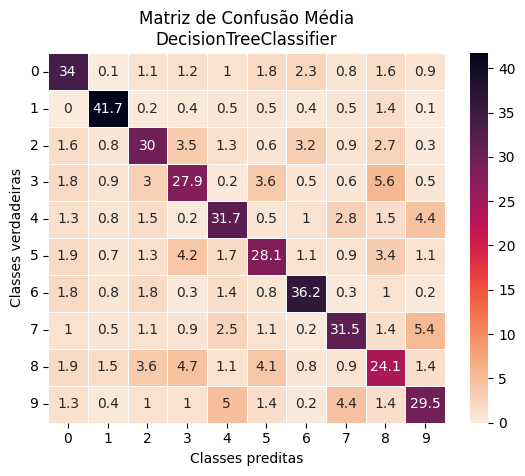

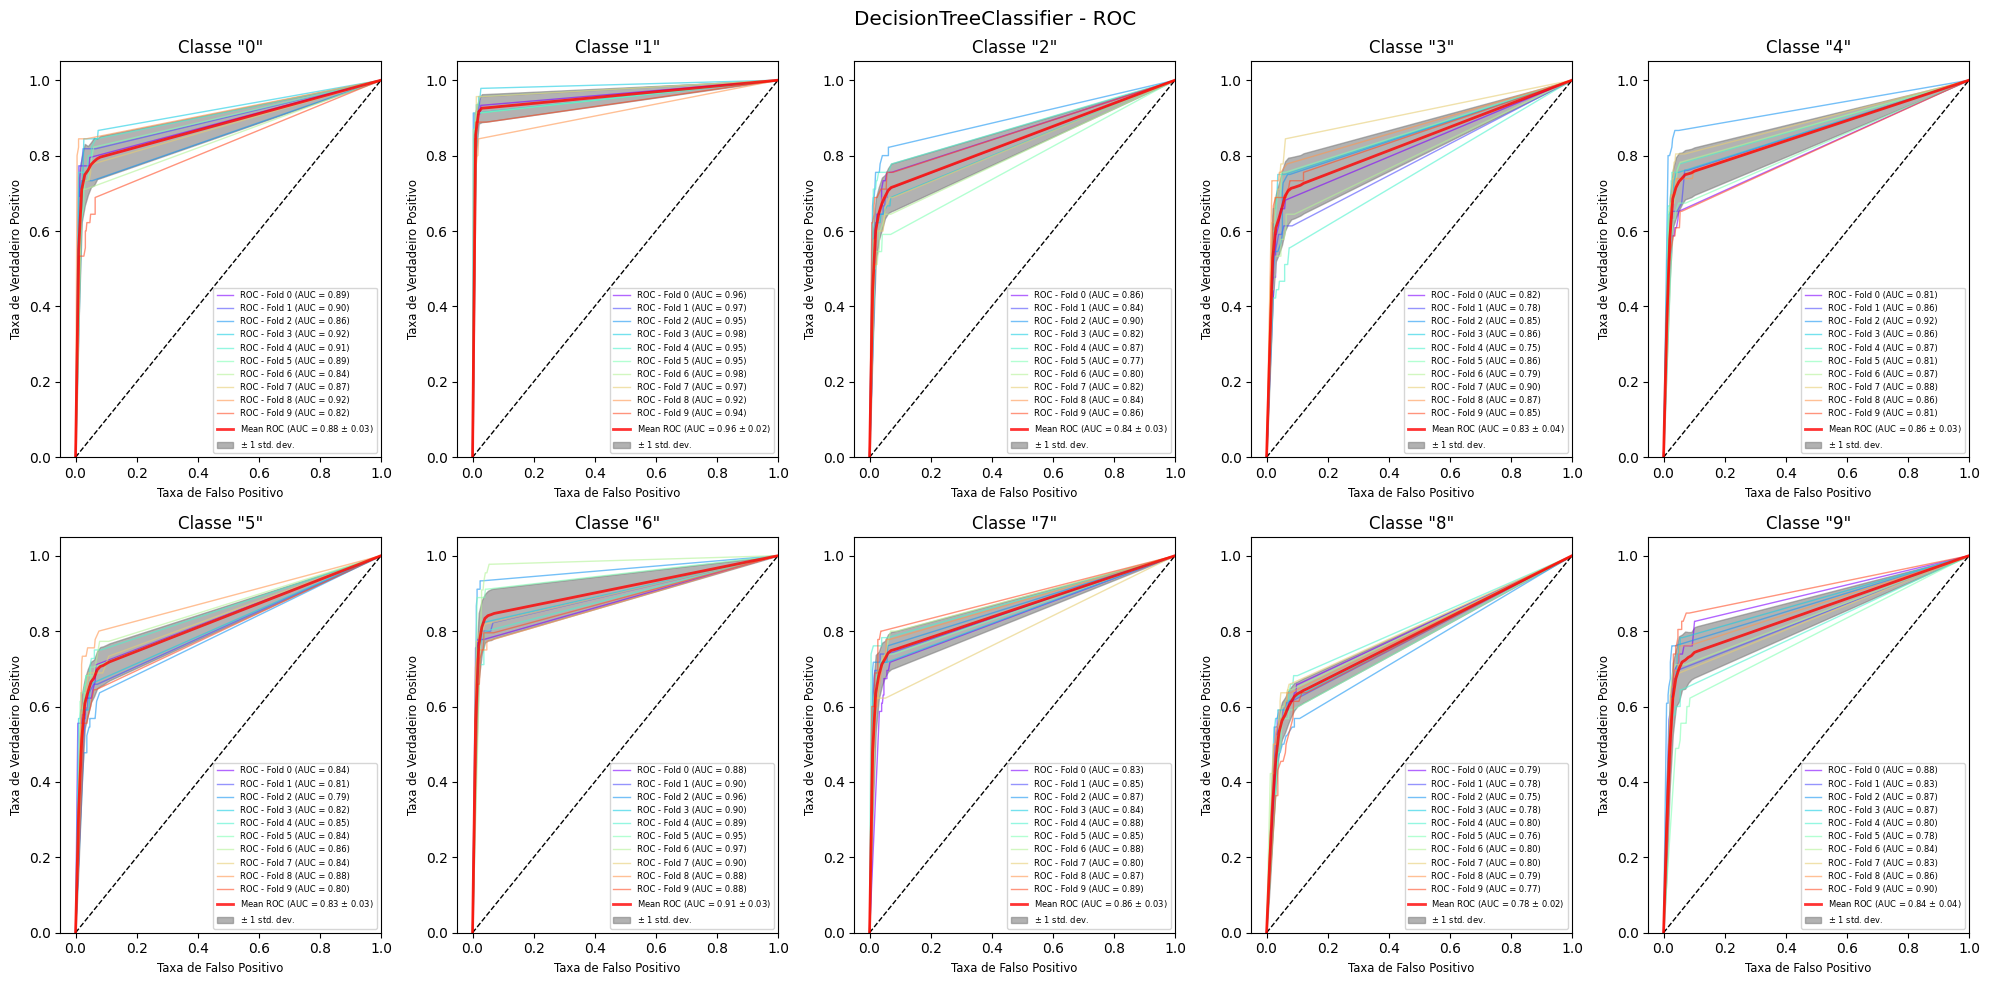

In [6]:
dt_results = Results('DecisionTreeClassifier', dt_acc, dt_f1, dt_cm, dt_roc, '')
dt_results.plot()

### GaussianNB

Resumo das métricas do modelo GaussianNB

Accurácia média (desvio): 0.831 (0.017)
F1-Score média (desvio): 0.831 (0.017)


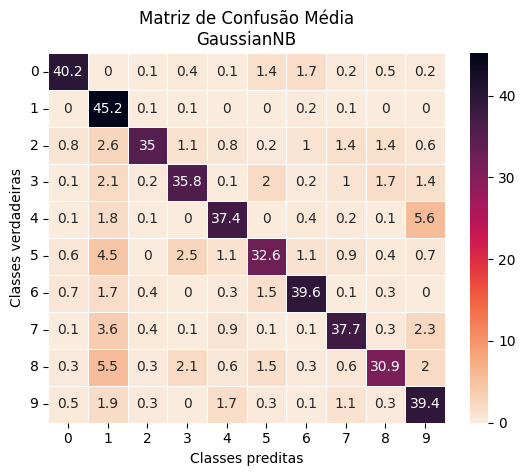

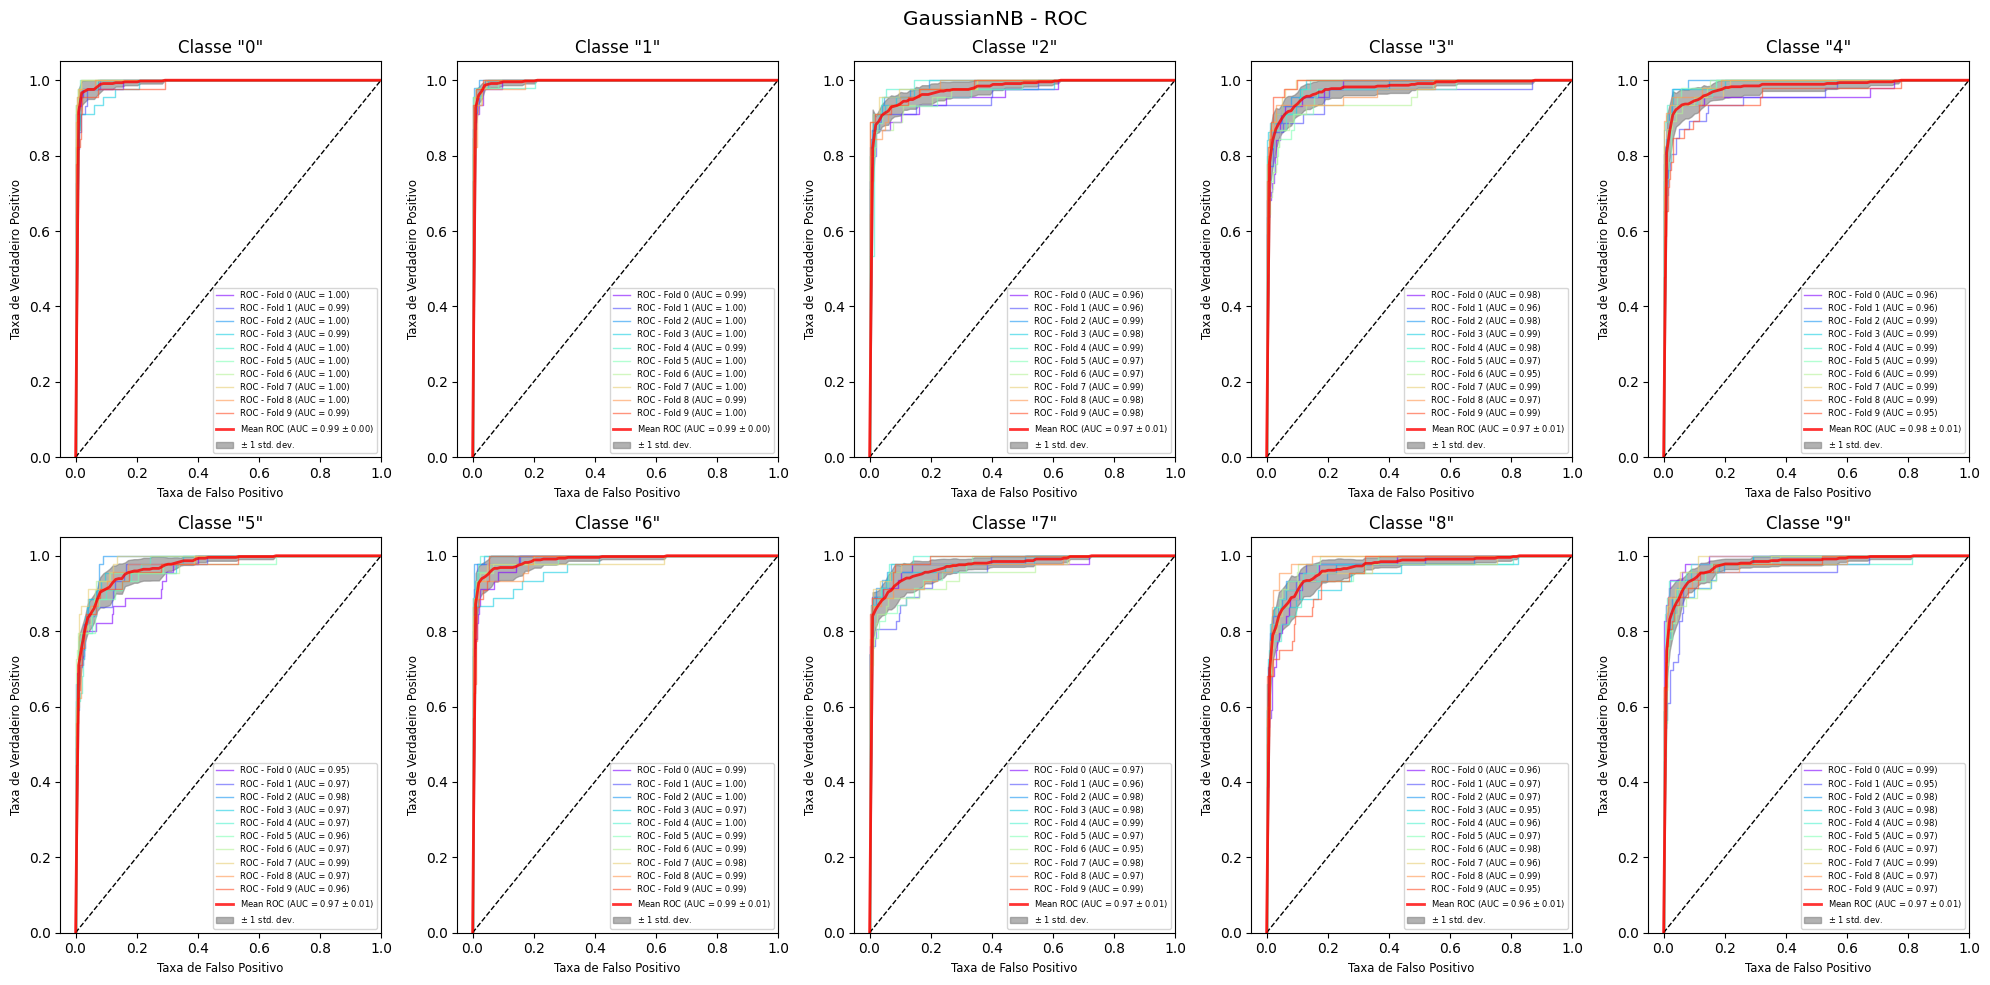

In [7]:
gnb_results = Results('GaussianNB', gnb_acc, gnb_f1, gnb_cm, gnb_roc, '')
gnb_results.plot()

### MultinomialNB

Resumo das métricas do modelo MultinomialNB

Accurácia média (desvio): 0.834 (0.019)
F1-Score média (desvio): 0.834 (0.019)


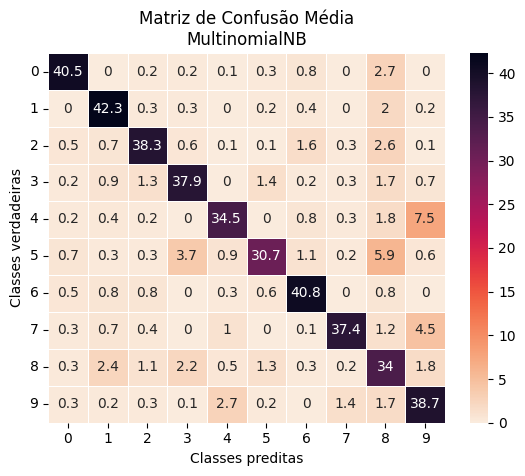

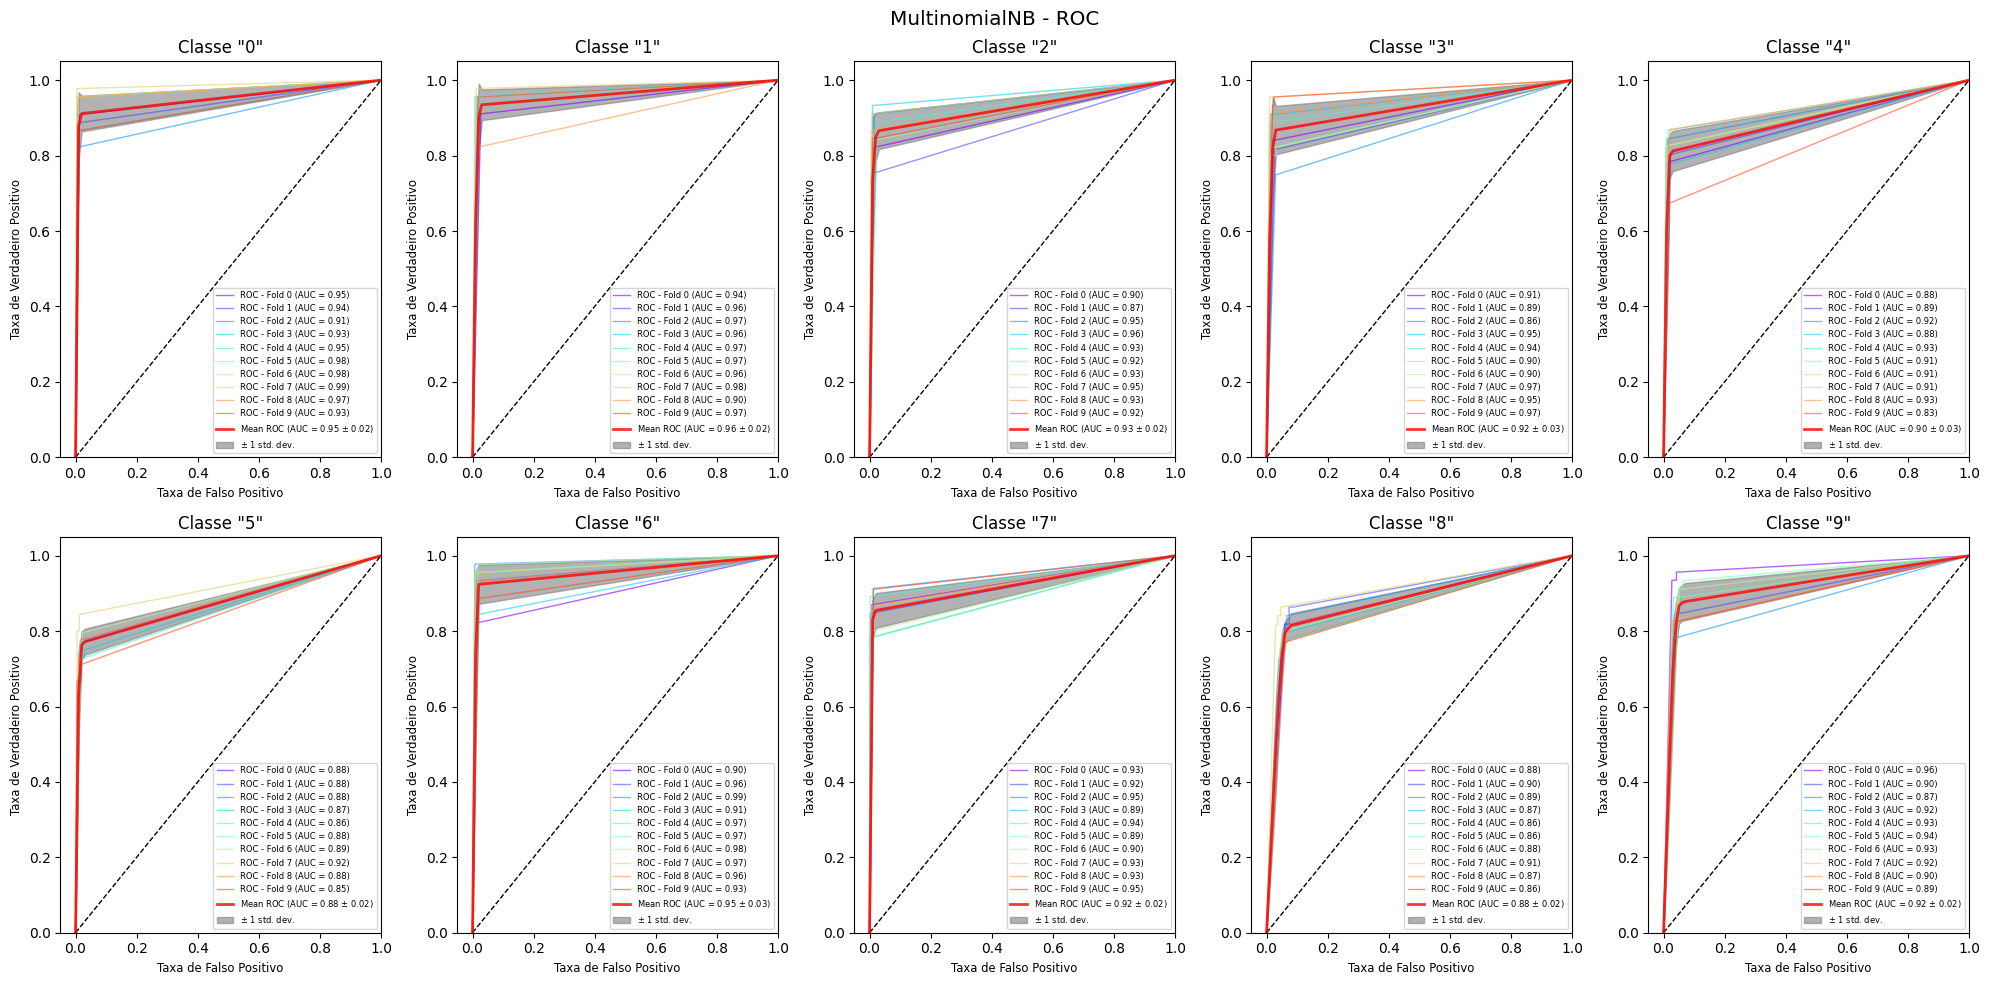

In [8]:
mnb_results = Results('MultinomialNB', mnb_acc, mnb_f1, mnb_cm, mnb_roc, '')
mnb_results.plot()

### MLP

Resumo das métricas do modelo MLP

Accurácia média (desvio): 0.940 (0.011)
F1-Score média (desvio): 0.940 (0.011)


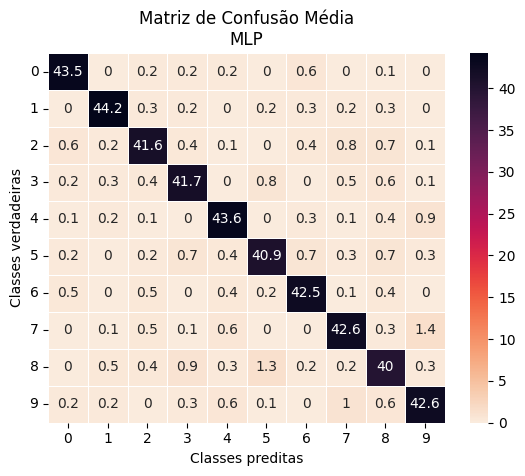

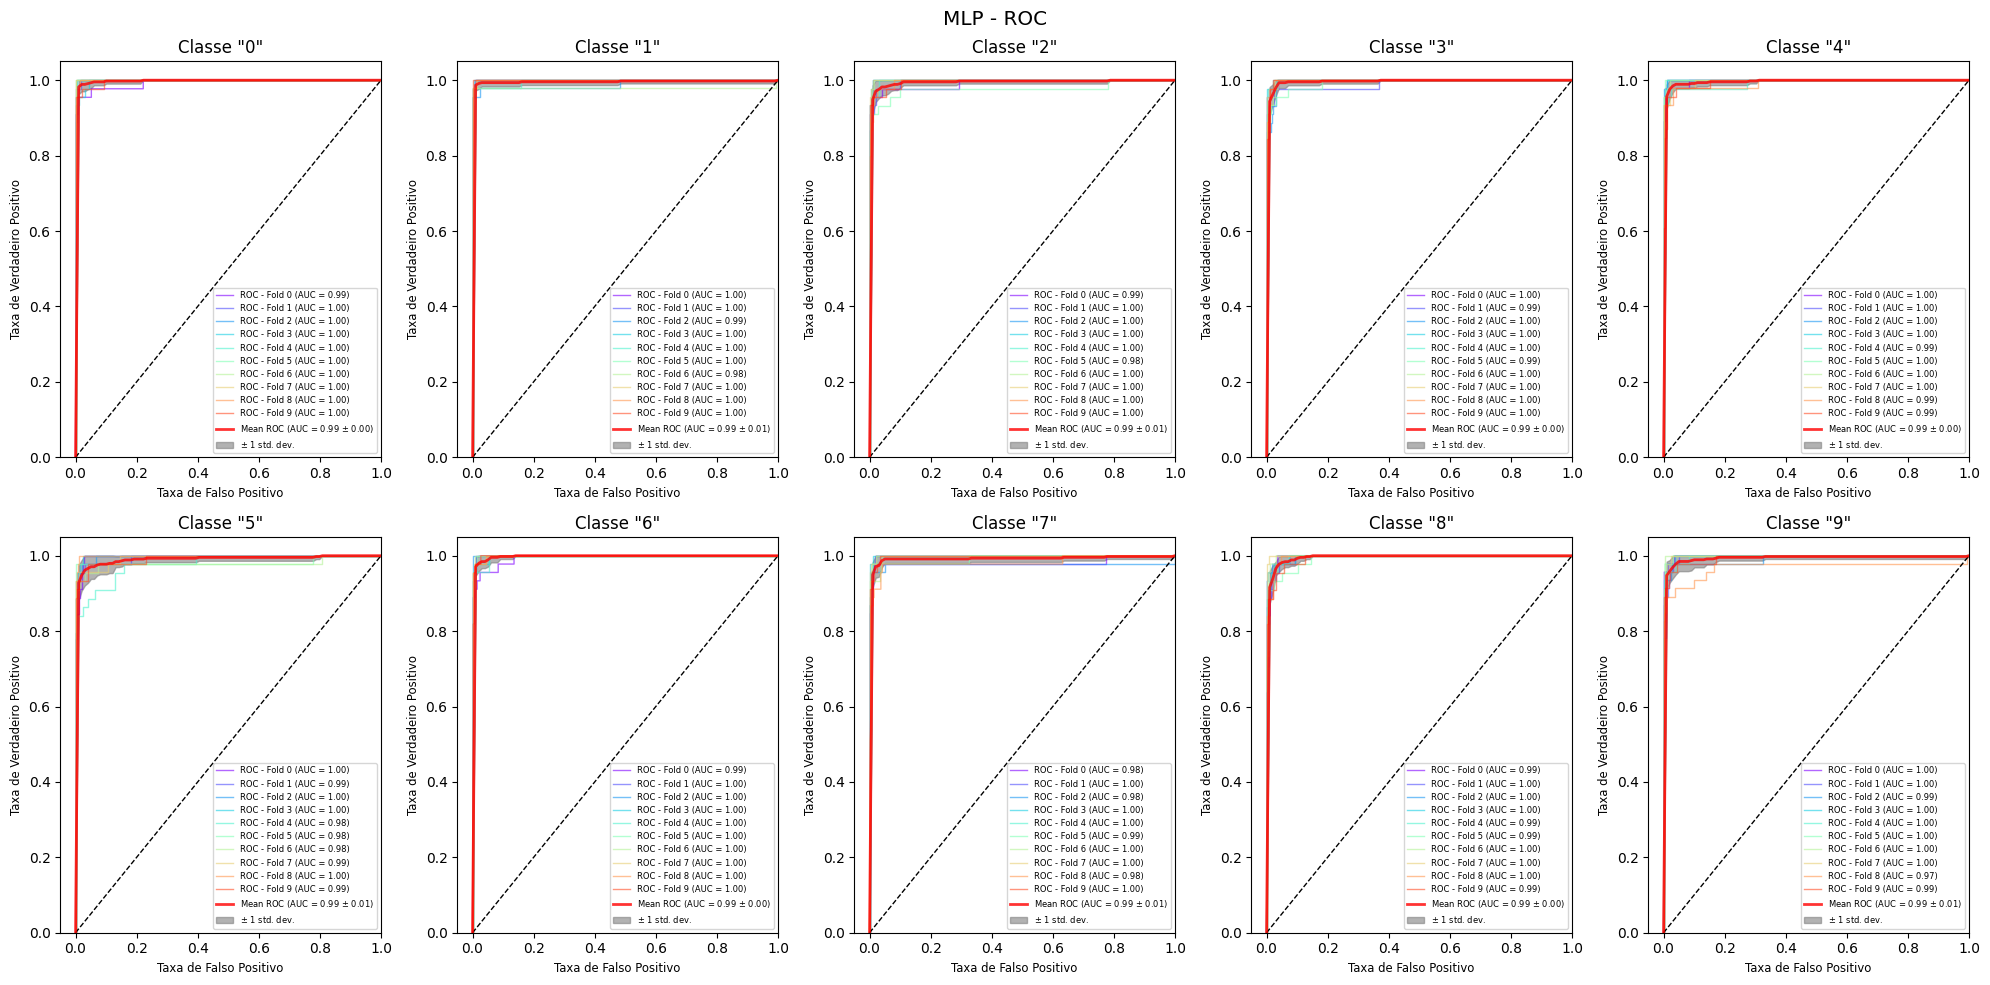

In [9]:
mlp_results = Results('MLP', mlp_acc, mlp_f1, mlp_cm, mlp_roc, '')
mlp_results.plot()

### KNN 

Resumo das métricas do modelo KNN

Accurácia média (desvio): 0.941 (0.011)
F1-Score média (desvio): 0.941 (0.011)


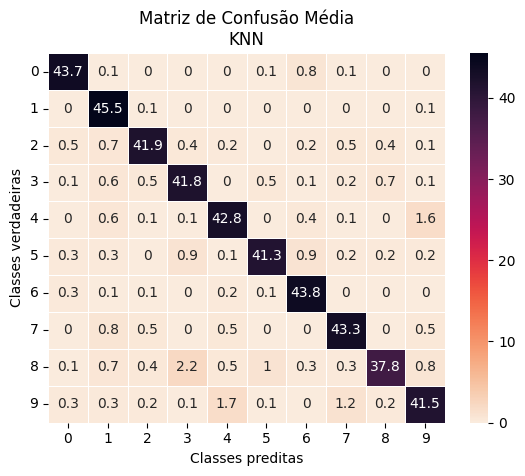

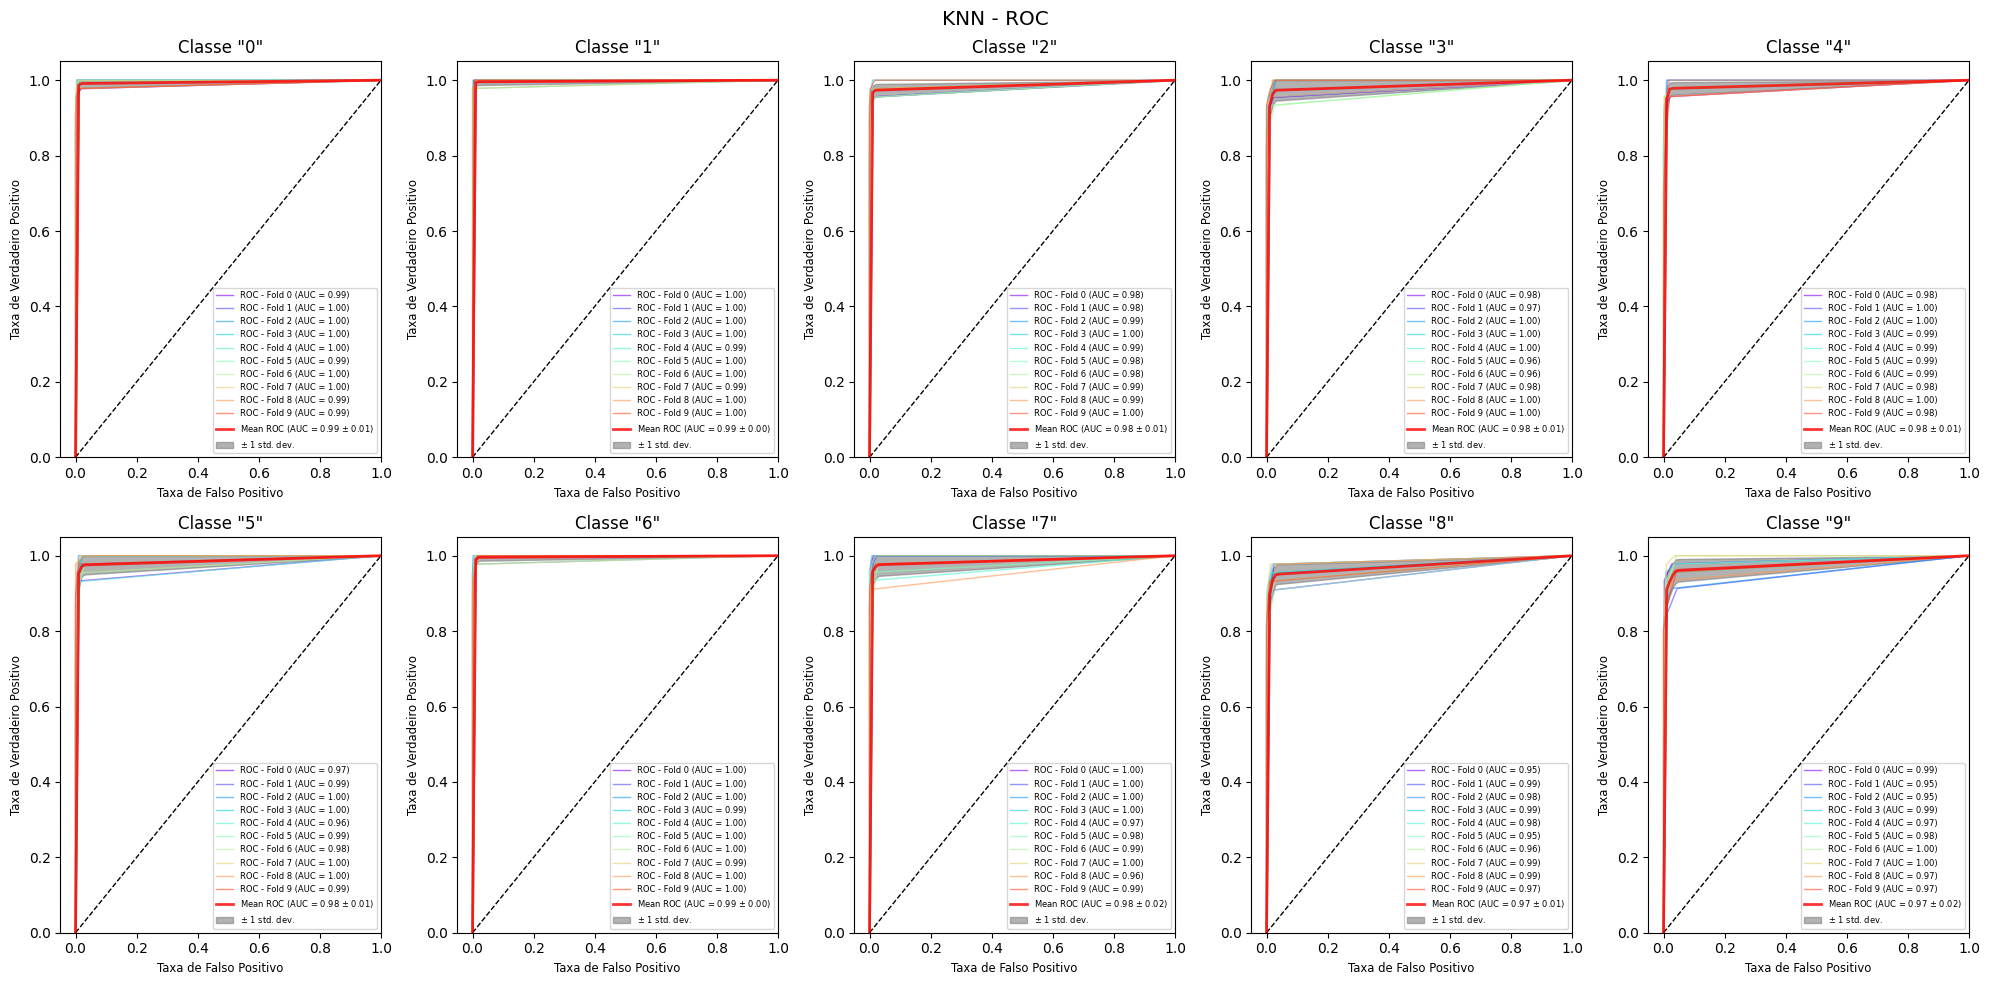

In [10]:
knn_results = Results('KNN', knn_acc, knn_f1, knn_cm, knn_roc, '')
knn_results.plot()

Resumo das métricas do modelo KNN PCA

Accurácia média (desvio): 0.928 (0.009)
F1-Score média (desvio): 0.927 (0.009)


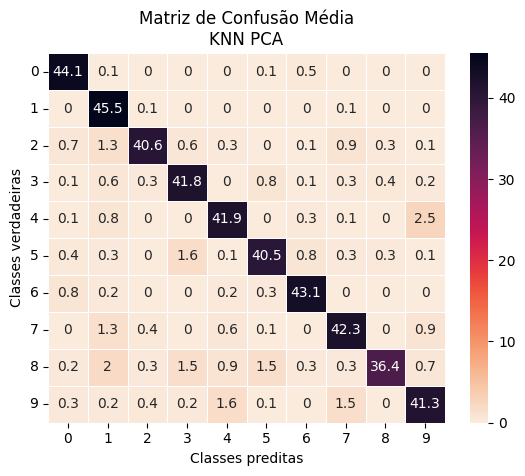

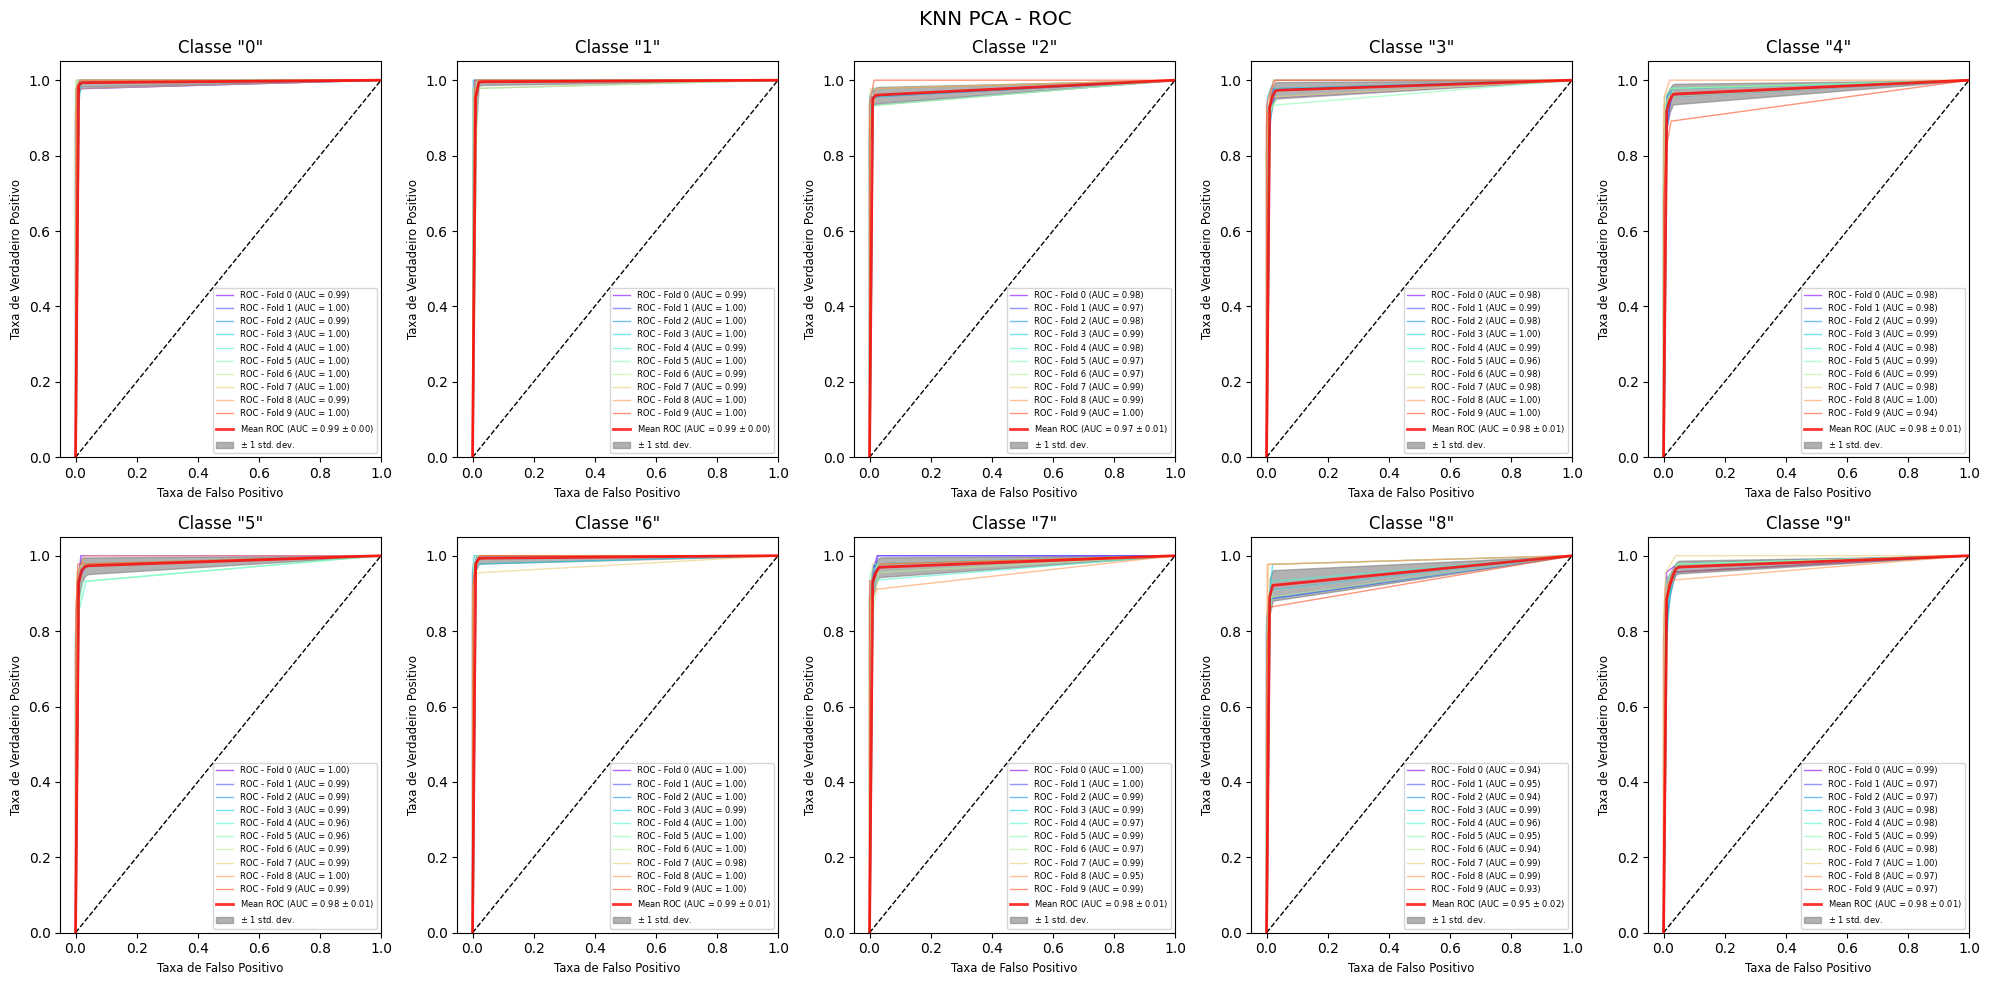

In [38]:
knn_pca_results = Results('KNN PCA', *knn, '')
knn_pca_results.plot()

### SVC

Resumo das métricas do modelo SVC

Accurácia média (desvio): 0.951 (0.008)
F1-Score média (desvio): 0.951 (0.008)


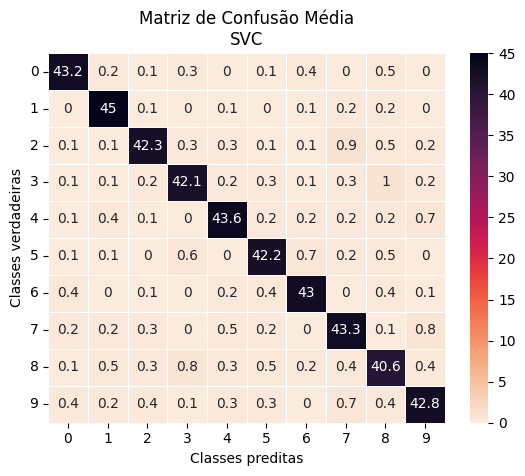

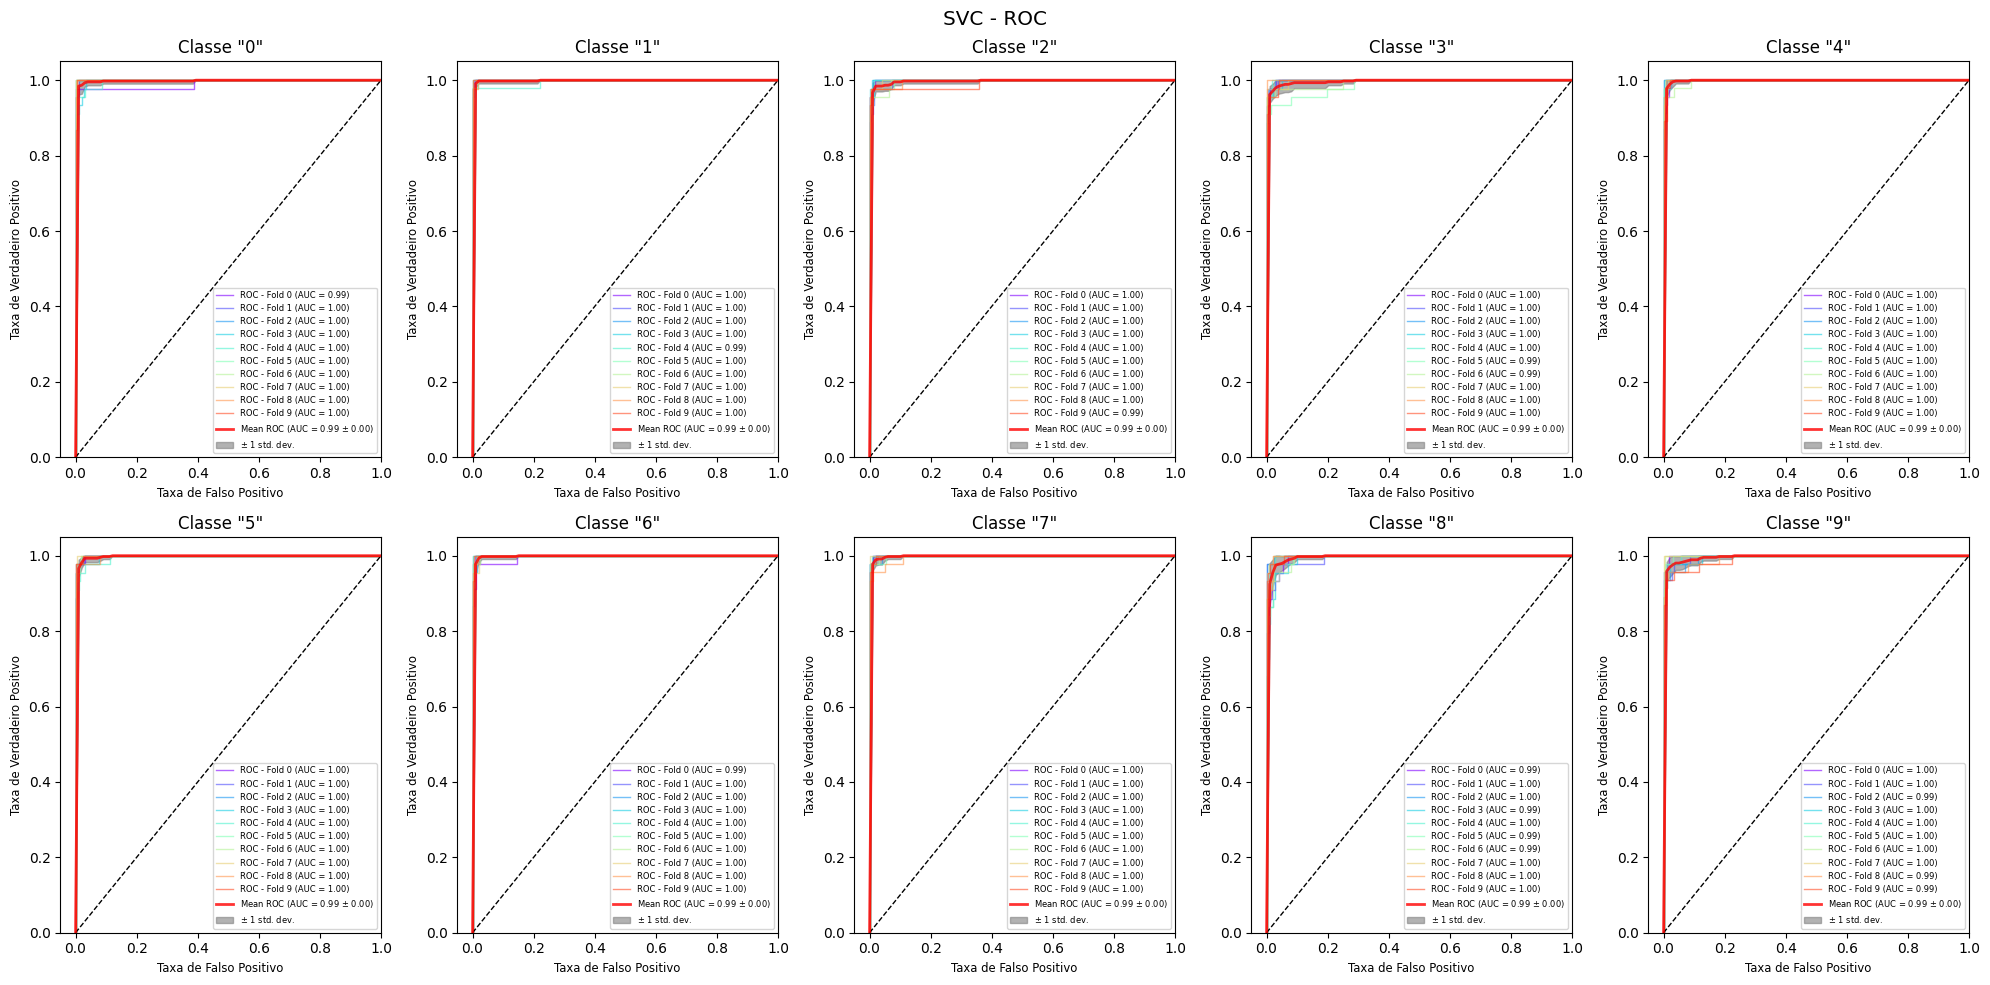

In [11]:
svc_results = Results('SVC', svc_acc, svc_f1, svc_cm, svc_roc, '')
svc_results.plot()

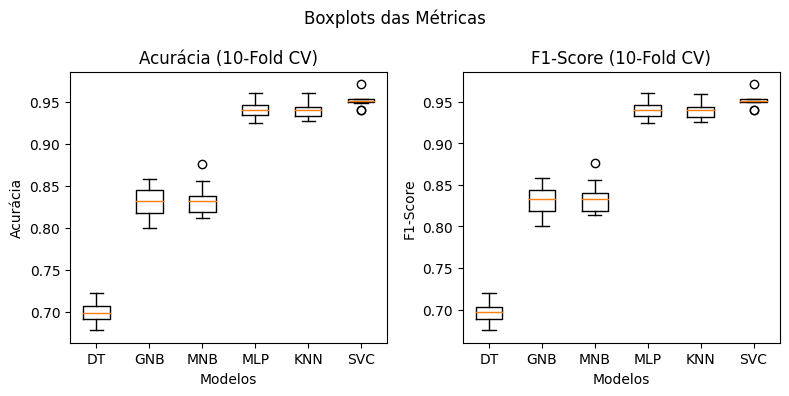

In [12]:
dfs = [acc_df, fscore_df]
metrics = ['Acurácia', 'F1-Score']

plot_box(dfs, metrics)

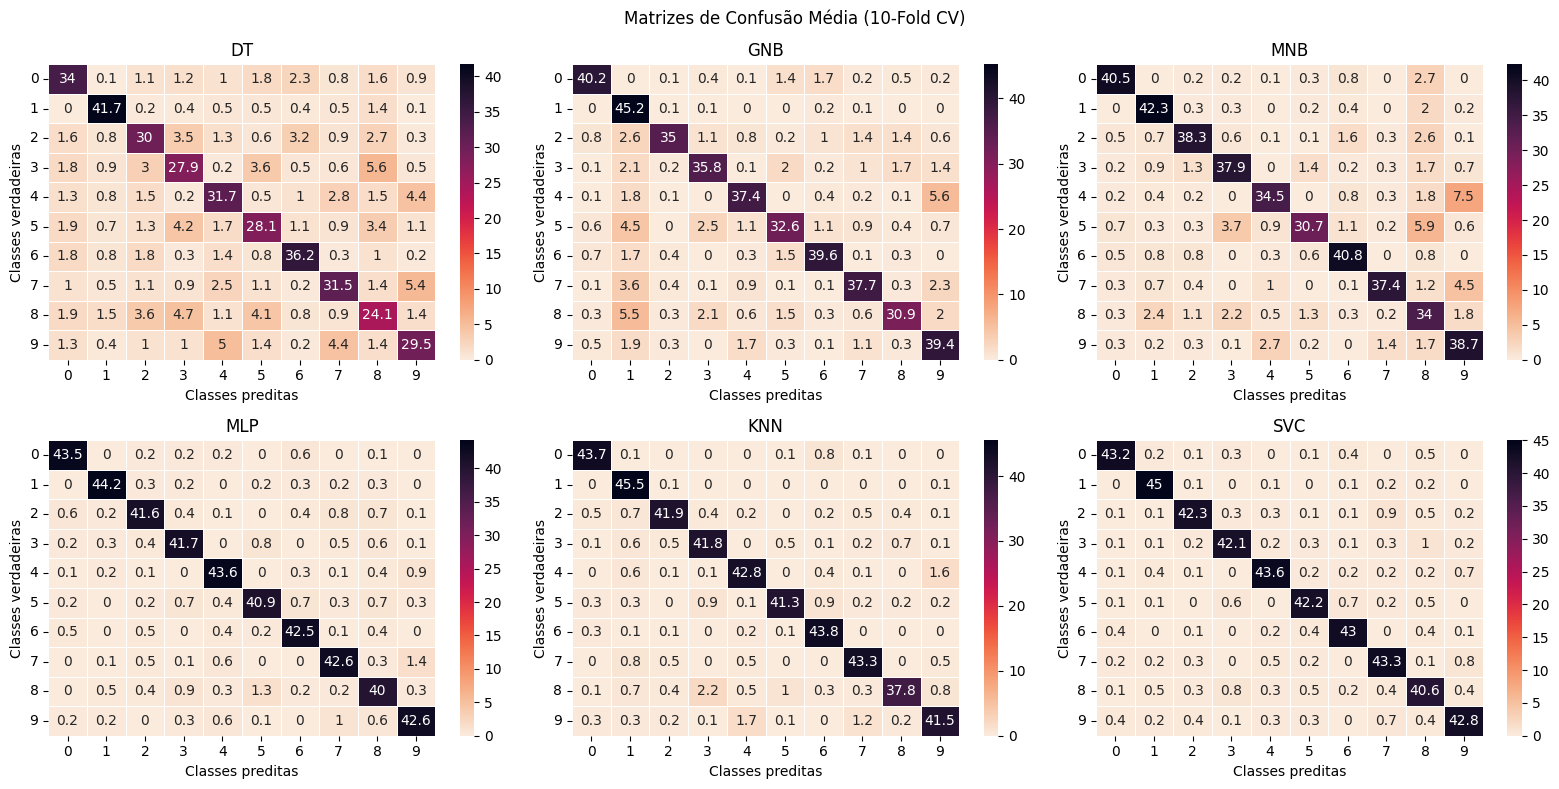

In [13]:
cm_list = [dt_cm, gnb_cm, mnb_cm, mlp_cm, knn_cm, svc_cm]
models_name = ['DT', 'GNB', 'MNB', 'MLP', 'KNN', 'SVC']
plot_cms(cm_list, models_name)

## Testes de Hipóteses


A seguir faremos testes de normalidade para a distribuição das Acurácias

### Hipóteses:

H0: Os dados seguem uma distribuição Normal

H1: C.C

In [14]:
from scipy import stats

def normality(test, *args):
    for arg in args:
        print(test(arg))
    
print('\nShapiro-Wilk\n')
normality(stats.shapiro, dt_acc, gnb_acc, mnb_acc, mlp_acc, knn_acc, svc_acc)
print('-----------------------------------------------------------------------')
print('\nNormalTeste\n')
normality(stats.normaltest, dt_acc, gnb_acc, mnb_acc, mlp_acc, knn_acc, svc_acc)


Shapiro-Wilk

ShapiroResult(statistic=0.9709431529045105, pvalue=0.8994495272636414)
ShapiroResult(statistic=0.9703179001808167, pvalue=0.8937773704528809)
ShapiroResult(statistic=0.9069873690605164, pvalue=0.2609320282936096)
ShapiroResult(statistic=0.9615648984909058, pvalue=0.8035596609115601)
ShapiroResult(statistic=0.9176837205886841, pvalue=0.3380407392978668)
ShapiroResult(statistic=0.8262187242507935, pvalue=0.03012700378894806)
-----------------------------------------------------------------------

NormalTeste

NormaltestResult(statistic=0.06719195680385992, pvalue=0.966962099300486)
NormaltestResult(statistic=0.4791868025139689, pvalue=0.786947767998555)
NormaltestResult(statistic=3.6566811712047294, pvalue=0.1606799813432359)
NormaltestResult(statistic=0.23106125850294224, pvalue=0.890893284424735)
NormaltestResult(statistic=0.8857388812836833, pvalue=0.6421910456654578)
NormaltestResult(statistic=5.944882052577228, pvalue=0.05117823032660515)


/home/balieiro/.local/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [15]:
print('\nShapiro-Wilk\n')
normality(stats.shapiro, dt_f1, gnb_f1, mnb_f1, mlp_f1, knn_f1, svc_f1)
print('-----------------------------------------------------------------------')
print('\nNormalTeste\n')
normality(stats.normaltest, dt_f1, gnb_f1, mnb_f1, mlp_f1, knn_f1, svc_f1)


Shapiro-Wilk

ShapiroResult(statistic=0.9557310342788696, pvalue=0.7363175749778748)
ShapiroResult(statistic=0.9588919281959534, pvalue=0.7731674313545227)
ShapiroResult(statistic=0.9055513143539429, pvalue=0.25180885195732117)
ShapiroResult(statistic=0.9616227149963379, pvalue=0.8042067885398865)
ShapiroResult(statistic=0.9112376570701599, pvalue=0.28960084915161133)
ShapiroResult(statistic=0.8317874670028687, pvalue=0.035160694271326065)
-----------------------------------------------------------------------

NormalTeste

NormaltestResult(statistic=0.07032472116192653, pvalue=0.9654486527276549)
NormaltestResult(statistic=0.5683393647990886, pvalue=0.7526389242918852)
NormaltestResult(statistic=3.282992886979419, pvalue=0.19368997920510952)
NormaltestResult(statistic=0.2620630941001395, pvalue=0.8771901011944989)
NormaltestResult(statistic=0.9576789637633089, pvalue=0.6195019179943504)
NormaltestResult(statistic=6.07037950737027, pvalue=0.04806554139659742)


Pelos resultados, não conseguimos rejeitar a hipótese nula para nenhum dos conjuntos de acurácia

T-test para comparar as acurácias médias entre os três modelos mais bem sucedidos

In [16]:
def ttest_multiple_samples(data:dict[str, list]) -> dict:
    from itertools import combinations

    combined_data = dict()
    for combined_key in combinations(data.keys(), 2):
        test_result = stats.ttest_rel(data[combined_key[0]], data[combined_key[1]], alternative='less')
        combined_data[f'{combined_key[0]}_{combined_key[1]}'] = test_result
        
    return combined_data

acc_data = {
    'MLP': mlp_acc,
    'KNN': knn_acc,
    'SVC': svc_acc,
}

test_results = ttest_multiple_samples(data=acc_data)

for result in test_results.keys():
    s = f"Comparação entre a Acurácia dos modelos {result.split('_')[0]} e {result.split('_')[1]}\n\n"
    s += 'H0: As médias das acurácias são iguais\n'
    s += f"H1: A acurácia de {result.split('_')[0]} é menor que a de {result.split('_')[1]}\n"
    s += f'\n {test_results[result]} \n'
    print(s)


Comparação entre a Acurácia dos modelos MLP e KNN

H0: As médias das acurácias são iguais
H1: A acurácia de MLP é menor que a de KNN

 Ttest_relResult(statistic=-0.11867816581938001, pvalue=0.4540685041373918) 

Comparação entre a Acurácia dos modelos MLP e SVC

H0: As médias das acurácias são iguais
H1: A acurácia de MLP é menor que a de SVC

 Ttest_relResult(statistic=-3.3297483715060885, pvalue=0.004401304495452533) 

Comparação entre a Acurácia dos modelos KNN e SVC

H0: As médias das acurácias são iguais
H1: A acurácia de KNN é menor que a de SVC

 Ttest_relResult(statistic=-3.0616023205910348, pvalue=0.006768253224553435) 



In [17]:
acc_data = {
    'MLP': mlp_f1,
    'KNN': knn_f1,
    'SVC': svc_f1,
}

test_results = ttest_multiple_samples(data=acc_data)

for result in test_results.keys():
    s = f"Comparação entre F1-Scores dos modelos {result.split('_')[0]} e {result.split('_')[1]}\n\n"
    s += 'H0: As médias das acurácias são iguais\n'
    s += f"H1: A acurácia de {result.split('_')[0]} é menor que a de {result.split('_')[1]}\n"
    s += f'\n {test_results[result]} \n'
    print(s)



Comparação entre F1-Scores dos modelos MLP e KNN

H0: As médias das acurácias são iguais
H1: A acurácia de MLP é menor que a de KNN

 Ttest_relResult(statistic=-0.0596478507684344, pvalue=0.4768697905233652) 

Comparação entre F1-Scores dos modelos MLP e SVC

H0: As médias das acurácias são iguais
H1: A acurácia de MLP é menor que a de SVC

 Ttest_relResult(statistic=-3.396555717537453, pvalue=0.003958207048708713) 

Comparação entre F1-Scores dos modelos KNN e SVC

H0: As médias das acurácias são iguais
H1: A acurácia de KNN é menor que a de SVC

 Ttest_relResult(statistic=-3.1502062444121064, pvalue=0.005866827594351189) 

